# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_resp = requests.get(btc_url)
btc_json = btc_resp.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']


# Fetch current ETH price
eth_resp = requests.get(eth_url)
eth_json = eth_resp.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
btc_value = btc_price * btc
eth_value = eth_price * eth

# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $48368.40
The current value of your 5.3 ETH is $13540.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
agg = 200
spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [15]:
# Format current date as ISO format
start_date = pd.Timestamp("2017-06-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    limit=1000
).df

# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Preview DataFrame
df_ticker.sort_index(ascending=True)

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-06-26 00:00:00-04:00  110.19  110.2400  110.1300  110.160   1364100   
2017-06-27 00:00:00-04:00  109.93  109.9800  109.7901  109.830   2883305   
2017-06-28 00:00:00-04:00  109.85  109.8800  109.6800  109.850  12016805   
2017-06-29 00:00:00-04:00  109.53  109.6800  109.4650  109.640   2457876   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.4600  109.490   2201175   
...                           ...       ...       ...      ...       ...   
2021-06-09 00:00:00-04:00  115.43  115.4300  114.9700  115.050   3418086   
2021-06-10 00:00:00-04:00  115.30  115.3100  114.8605  115.300   3665934   
2021-06-11 00:00:00-04:00  115.31  115.3200  115.1600  115.240   3476373   
2021-06-14 00:00:00-04:00  115.18  115.1800  114.9350  114.970   2999623   
2021-06-15 00:00:00-04:00  114.90  115.0200  114.8700  114.995   5842592   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-06-26 00:00:00-04:00  243.89  244.380  243.045  243.27  43153677  
2017-06-27 00:00:00-04:00  243.04  243.380  241.310  241.36  60858189  
2017-06-28 00:00:00-04:00  242.50  243.715  242.230  243.46  50076355  
2017-06-29 00:00:00-04:00  243.66  243.720  239.955  241.39  87799860  
2017-06-30 00:00:00-04:00  242.26  242.710  241.575  241.77  50347309  
...                           ...      ...      ...     ...       ...  
2021-06-09 00:00:00-04:00  423.18  423.260  421.410  421.62  38368598  
2021-06-10 00:00:00-04:00  422.96  424.630  421.550  423.58  43577329  
2021-06-11 00:00:00-04:00  424.19  424.420  422.820  424.31  37018077  
2021-06-14 00:00:00-04:00  424.43  425.290  423.100  425.29  33128340  
2021-06-15 00:00:00-04:00  425.43  425.460  423.540  424.50  42885806  

[1000 rows x 10 columns]

In [16]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'][0]
spy_close_price = df_ticker['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $110.16
Current SPY closing price: $243.27


In [19]:
# Compute the current value of shares
spy_value = spy_close_price * spy
agg_value = agg_close_price * agg

# Print current value of shares
print(f"The current value of your {spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $12163.50
The current value of your 200 AGG shares is $22032.00


### Savings Health Analysis

In [20]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
total_crypto = btc_value + eth_value
total_shares = spy_value + agg_value
data = [ total_crypto, total_shares]
df_savings = pd.DataFrame(data, index=['crypto','shares'], columns=['amount'])
 
# Create savings DataFrame

# Display savings DataFrame
display(df_savings)

,amount
crypto,61908.999
shares,34195.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

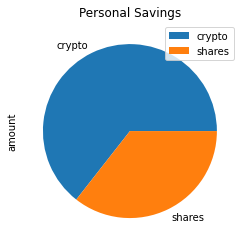

In [21]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Personal Savings')

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough savings to cover your emergency fund!")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal")

Congratulations! You have enough savings to cover your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-14', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

timeframe = "1D"

df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

next_start_date = pd.Timestamp('2016-04-17', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2017-04-25', tz='America/New_York').isoformat()

df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=1000
).df

df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1])

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864.0  207.13   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082.0  209.74   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220.0  209.95   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934.0  210.12   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801.0  208.56   

                                                               
                             high     low   close      volume  
time                                                           
2016-04-18 00:00:00-04:00  209.28  207.00  209.28  57240308.0  
2016-04-19 00:00:00-04:00  210.20  208.94  209.87  67063226.0  
2016-04-20 00:00:00-04:00  210.92  209.39  210.06  55699861.0  
2016-04-21 00:00:00-04:00  210.25  208.65  208.96  58074832.0  
2016-04-22 00:00:00-04:00  209.29  207.91  208.99  65504515.0

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_stocks_dist.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864.0   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082.0   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220.0   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934.0   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-18 00:00:00-04:00          NaN  207.13  209.28  207.00  209.28   
2016-04-19 00:00:00-04:00    -0.000180  209.74  210.20  208.94  209.87   
2016-04-20 00:00:00-04:00    -0.002254  209.95  210.92  209.39  210.06   
2016-04-21 00:00:00-04:00    -0.001446  210.12  210.25  208.65  208.96   
2016-04-22 00:00:00-04:00     0.000271  208.56  209.29  207.91  208.99   

                                                    
                               volume daily_return  
time                                                
2016-04-18 00:00:00-04:00  57240308.0          NaN  
2016-04-19 00:00:00-04:00  67063226.0     0.002819  
2016-04-20 00:00:00-04:00  55699861.0     0.000905  
2016-04-21 00:00:00-04:00  58074832.0    -0.005237  
2016-04-22 00:00:00-04:00  65504515.0     0.000144

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999177,0.988823,0.999092,0.986257,1.005400,0.991869,1.001774,1.002535,1.004473,1.002906,...,0.993608,0.998835,1.006899,0.986628,1.002198,1.010854,1.007404,1.005751,1.002197,1.017134
2,1.000563,0.991247,1.001615,0.980266,1.015458,0.992589,0.996598,0.999276,1.006101,0.991048,...,0.983495,0.995090,1.008220,0.979237,1.010307,1.021970,1.010275,0.992663,0.997598,1.003034
3,1.004248,0.995316,0.990757,0.964375,1.016883,0.996989,0.989730,0.986807,1.014683,0.978747,...,0.988642,1.001379,1.004356,0.981519,0.999243,1.018337,1.008687,0.991956,0.986362,1.013802
4,1.003431,1.000173,0.987280,0.951890,1.022612,0.989726,0.981055,0.998987,1.017320,0.981356,...,0.987762,1.008774,1.006025,0.985311,0.999739,1.017172,1.010962,0.996560,0.977474,1.012587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.800688,12.847194,19.808900,23.074444,12.536444,17.058993,18.749001,6.509153,14.335400,49.641964,...,7.995861,15.374736,23.293904,12.460417,16.285745,38.501211,4.787083,6.138448,9.811618,26.734201
7557,25.338677,12.748163,19.539468,23.156465,12.533895,16.955087,18.698569,6.568920,14.510800,49.165185,...,8.067026,15.371026,23.387128,12.453579,16.274405,38.657263,4.754541,6.170936,9.845858,26.997596
7558,25.136387,12.937961,19.486357,23.040163,12.478027,16.971708,18.599900,6.559601,14.660091,49.049893,...,8.105293,15.084663,23.247914,12.575735,16.242763,39.129289,4.699379,6.210497,9.876537,27.197364
7559,25.022353,13.072646,19.543296,22.837067,12.443626,17.040264,18.462166,6.609190,14.783732,48.740840,...,8.159175,14.912144,23.492237,12.595946,16.074895,39.138562,4.703009,6.195710,9.762155,27.094411


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

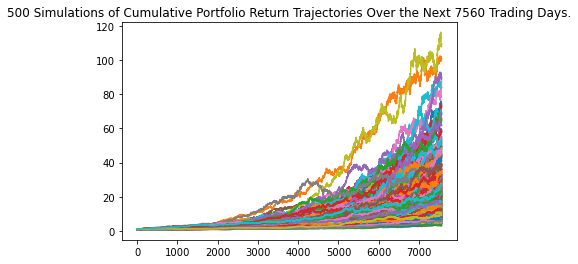

In [28]:
# Plot simulation outcomes
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

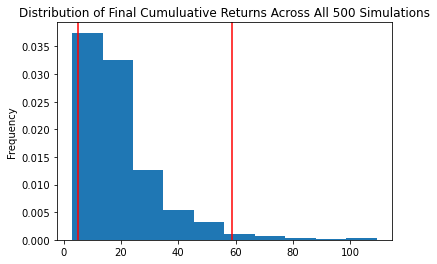

In [33]:
# Plot probability distribution and confidence intervals
MC_stocks_dist.plot_distribution()


### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_stocks_dist.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean             20.145683
std              14.711155
min               3.021939
25%              10.073568
50%              16.468104
75%              24.425575
max             109.188132
95% CI Lower      5.122339
95% CI Upper     58.641219
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $102446.78 and $1172824.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $153670.17 and $1759236.57


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003002,0.999378,1.007594,1.001698,1.005882,0.996737,1.009191,0.995428,1.005226,1.003079,...,1.000345,0.982804,1.004132,0.993670,1.013744,1.005891,1.005929,0.992245,1.005049,0.988440
2,1.007391,0.998659,1.000021,1.000251,1.014307,1.006438,1.011604,0.997677,1.016634,1.003520,...,0.982495,0.981549,1.017144,0.988622,1.022696,1.015937,1.006029,1.000580,1.009264,0.980311
3,1.025708,0.985520,0.998020,1.009306,1.011002,0.997801,1.011829,0.988629,1.015649,0.999986,...,0.993672,0.991178,1.011114,1.002244,1.011203,1.005845,0.995021,1.002368,1.011633,0.977990
4,1.029513,0.971849,1.004059,0.994768,1.010980,1.005723,1.001247,0.995090,1.018981,0.989908,...,1.007183,0.986202,1.009840,1.014489,1.026252,1.010441,0.998667,1.016183,0.999388,0.973991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.892520,1.734224,1.264651,2.763516,0.687146,2.006329,1.761696,1.875279,2.543541,1.225164,...,1.340366,2.160276,2.186301,1.954030,1.219347,1.690316,2.312909,2.303310,2.782783,1.824039
1257,1.902197,1.731993,1.255870,2.760410,0.686159,2.030354,1.764858,1.863335,2.528305,1.225993,...,1.343282,2.209822,2.194953,1.961986,1.226653,1.671919,2.325490,2.291991,2.777450,1.839746
1258,1.905521,1.760018,1.241197,2.759055,0.698557,2.057492,1.752292,1.845586,2.502967,1.226194,...,1.341612,2.193791,2.183493,1.962477,1.210704,1.652903,2.350040,2.291711,2.784755,1.848654
1259,1.925363,1.784170,1.226629,2.747251,0.710559,2.034750,1.725012,1.819309,2.537550,1.220562,...,1.340661,2.186073,2.164050,1.982076,1.200335,1.643551,2.333631,2.329454,2.770573,1.859343


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

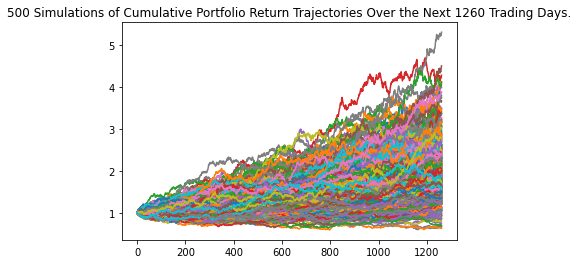

In [40]:
# Plot simulation outcomes
MC_stocks_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

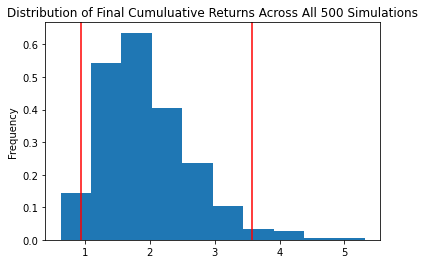

In [41]:
# Plot probability distribution and confidence intervals
MC_stocks_5.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_stocks_5.summarize_cumulative_return()

# Print summary statistics
summary_5

count           500.000000
mean              1.953288
std               0.684044
min               0.629607
25%               1.455027
50%               1.822016
75%               2.320219
max               5.313779
95% CI Lower      0.940532
95% CI Upper      3.582433
Name: 1260, dtype: float64

In [45]:
# Set initial investment
initial_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5[8]*initial_investment, 2)
ci_upper_five = round(summary_5[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $23513.3 and $89560.82


### Ten Years Retirement Option

In [46]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [47]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993651,1.004857,0.992867,1.001191,0.980978,0.989895,1.007380,1.002896,1.022405,1.001737,...,0.989384,1.012705,0.997892,0.993417,0.996963,1.001715,0.991410,0.995814,1.012901,1.008633
2,0.993704,0.987456,1.003529,1.000235,0.981420,0.974253,1.006905,0.991545,1.027718,1.014044,...,0.990269,1.002617,0.984435,0.988698,0.995635,0.995942,0.999805,0.992144,1.006137,1.005666
3,0.997702,0.993807,0.994675,0.974121,0.977625,0.963079,1.012017,0.989155,1.015019,1.005369,...,1.004354,1.009352,0.988085,0.993679,0.996455,0.988613,0.993051,0.988763,1.019303,0.992915
4,0.991519,0.998972,0.985548,0.965700,0.976826,0.959276,1.011918,0.990570,1.012478,1.013911,...,1.011224,1.011926,0.973979,1.000078,0.990198,0.981067,0.990371,0.979863,1.033573,0.975600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.093459,4.121408,3.952709,3.987452,2.195487,1.267798,7.692068,2.634752,2.632960,1.947493,...,2.354396,2.838552,3.528518,2.444036,3.184718,5.162661,2.167701,2.776807,2.350539,5.109514
2517,2.090527,4.085208,3.975279,4.020448,2.184482,1.263383,7.727112,2.648003,2.608205,1.975592,...,2.376233,2.827424,3.509575,2.411931,3.189814,5.114421,2.154775,2.765759,2.359146,5.145645
2518,2.094108,4.049048,4.020342,4.009788,2.184193,1.256488,7.669517,2.630721,2.626800,1.997427,...,2.394225,2.852596,3.510166,2.423003,3.160654,5.126662,2.156355,2.721659,2.376380,5.200116
2519,2.070738,4.025184,4.037890,4.005987,2.158079,1.250167,7.706473,2.597513,2.615250,2.007991,...,2.362919,2.811493,3.514160,2.398641,3.151014,5.142365,2.149367,2.733245,2.369820,5.180860


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

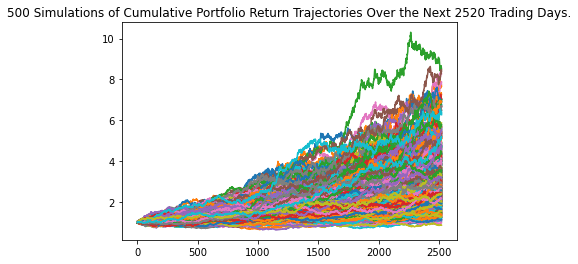

In [48]:
# Plot simulation outcomes
MC_stocks_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

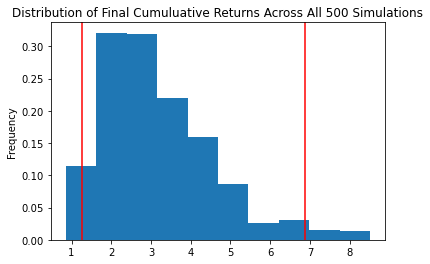

In [49]:
# Plot probability distribution and confidence intervals
MC_stocks_10.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_stocks_10.summarize_cumulative_return()

# Print summary statistics
summary_10

count           500.000000
mean              3.181863
std               1.390901
min               0.855813
25%               2.186641
50%               2.888461
75%               3.961266
max               8.517068
95% CI Lower      1.260106
95% CI Upper      6.889144
Name: 2520, dtype: float64

In [51]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary[8]*initial_investment, 2)
ci_upper_ten = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $204893.56 and $2345648.76
